# Bank Problem

The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
bank_1 = pd.read_csv("Bank_file1.csv")
bank_2 = pd.read_csv("Bank_file2.csv")
bank_3 = pd.read_csv("bank_file3.csv")
bank_target_file = pd.read_csv("Bank_target file.csv")

In [3]:
bank_1.head()

,ID,age,job,marital,education
0,C1,30,blue-collar,married,basic.9y
1,C2,39,services,single,high.school
2,C3,25,services,married,high.school
3,C4,38,services,married,basic.9y
4,C5,47,admin.,married,university.degree


In [4]:
bank_2.head()

,ID,default,housing,loan,contact,month
0,C1,no,yes,no,cellular,may
1,C2,no,no,no,telephone,may
2,C3,no,yes,no,telephone,jun
3,C4,no,unknown,unknown,telephone,jun
4,C5,no,yes,no,cellular,nov


In [5]:
bank_3.head()

,ID,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,C1,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,C2,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,C3,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,C4,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,C5,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [6]:
bank_target_file.head()

,ID,approved
0,C1,no
1,C2,no
2,C3,no
3,C4,no
4,C5,no


In [7]:
bank_1.shape, bank_2.shape

((4119, 5), (4119, 6))

In [8]:
bank_3.shape, bank_target_file.shape

((4119, 12), (4119, 2))

In [9]:
# checking unique values
common_lst = []

for col in bank_1.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in bank_2.columns:
        common_lst.append(col)                                                  # Add the common columns in new list

print(common_lst)

['ID']


In [10]:
common_lst1 = []

for col in bank_3.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in bank_target_file.columns:
        common_lst1.append(col)                                                  # Add the common columns in new list

print(common_lst1)

['ID']


In [11]:
#meging datasets
Bank1 = pd.merge(bank_1, bank_2, on = "ID")

In [12]:
#meging datasets
Bank2 = pd.merge(bank_3, bank_target_file, on = "ID")   

In [13]:
Bank_total = pd.merge(Bank1,Bank2, on = "ID") 

In [14]:
Bank_total.shape

(4119, 22)

In [15]:
Bank_total.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
0,C1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,C2,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,C3,25,services,married,high.school,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,C4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,C5,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [16]:
Bank_total.tail()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
4114,C4115,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,C4116,39,admin.,married,high.school,no,yes,no,telephone,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,C4117,27,student,single,high.school,no,no,no,cellular,may,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,C4118,58,admin.,married,high.school,no,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,C4119,34,management,single,high.school,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [17]:
Bank_total.dtypes

ID                 object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
approved           object
dtype: object

In [18]:
Bank_total.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
Bank_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4118
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4119 non-null   object 
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   contact         4119 non-null   object 
 9   month           4119 non-null   object 
 10  day_of_week     4119 non-null   object 
 11  duration        4119 non-null   int64  
 12  campaign        4119 non-null   int64  
 13  pdays           4119 non-null   int64  
 14  previous        4119 non-null   int64  
 15  poutcome        4119 non-null   object 
 16  emp.var.rate    4119 non-null   float64
 17  cons.price.idx  4119 non-null   f

In [20]:
Bank_total.approved.value_counts()

no     3668
yes     451
Name: approved, dtype: int64

In [21]:
Bank_total.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [22]:
Bank_total.isna().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [23]:
#converting categorical to numerical by replacing yes and no by 1 and 0
Bank_total['approved'].replace(['yes', 'no'],[1, 0], inplace=True)

In [24]:
Bank_total.dtypes

ID                 object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
approved            int64
dtype: object

In [25]:
#to know the number of numerical and categorical features
num_data = Bank_total.select_dtypes(exclude='object')
cat_data = Bank_total.select_dtypes(include='object')

In [26]:
Corr_b=num_data.corr()

<AxesSubplot:>

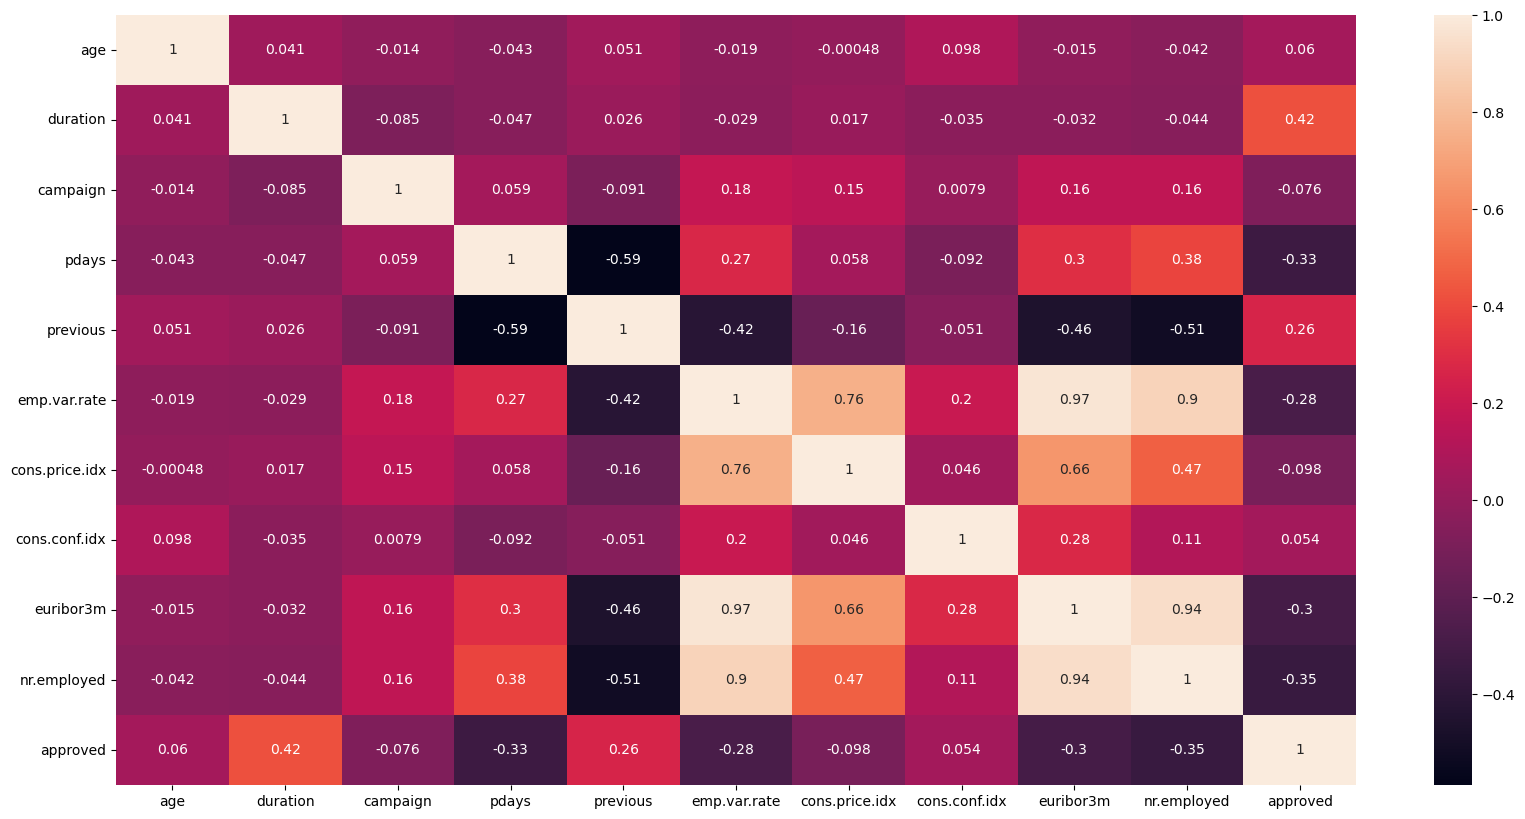

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(Corr_b,annot=True)

In [28]:
#drop the columns
Bank_total.drop(['cons.price.idx'], axis=1, inplace = True)

In [29]:
#drop the Columns
Bank_total.drop(['cons.conf.idx'], axis=1, inplace = True)

In [30]:
#drop the Columns
Bank_total.drop(['euribor3m'], axis=1, inplace = True)

In [31]:
num_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0


In [32]:
cat_data.head()

,ID,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,C1,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,C2,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,C3,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,C4,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,C5,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent


**checking for outliers**

<AxesSubplot:xlabel='age'>

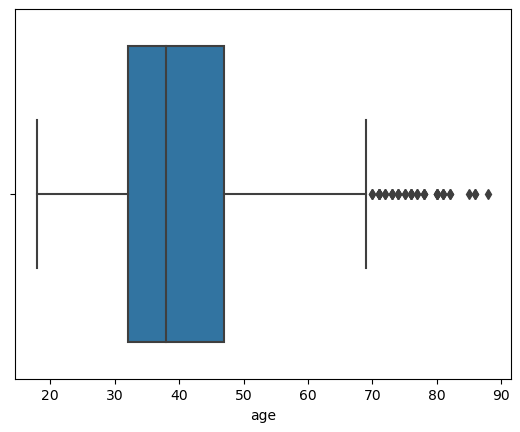

In [33]:
sns.boxplot(x=Bank_total["age"])

<AxesSubplot:xlabel='duration'>

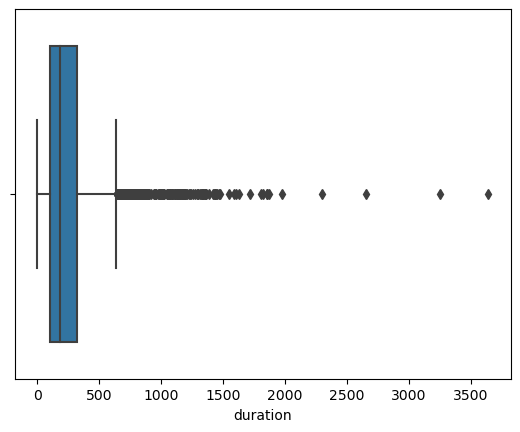

In [34]:
sns.boxplot(x=Bank_total["duration"])

<AxesSubplot:xlabel='campaign'>

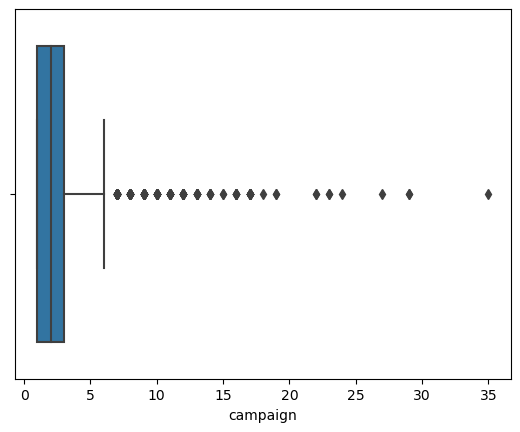

In [35]:
sns.boxplot(x=Bank_total["campaign"])

**Treating outliers**

**age**

In [36]:
tenth_percentile=np.percentile(Bank_total['age'],10)
ninetieth_percentile=np.percentile(Bank_total['age'],90)
print(tenth_percentile,ninetieth_percentile)
Bank_total['age']=np.where(Bank_total['age']<tenth_percentile,tenth_percentile,Bank_total['age']) 
Bank_total['age']=np.where(Bank_total['age']>ninetieth_percentile,ninetieth_percentile,Bank_total['age'])

28.80000000000001 55.0


**duration**

In [37]:
tenth_percentile=np.percentile(Bank_total['duration'],10)
ninetieth_percentile=np.percentile(Bank_total['duration'],90)
print(tenth_percentile,ninetieth_percentile)
Bank_total['duration']=np.where(Bank_total['duration']<tenth_percentile,tenth_percentile,Bank_total['duration']) 
Bank_total['duration']=np.where(Bank_total['duration']>ninetieth_percentile,ninetieth_percentile,Bank_total['duration'])

60.0 545.2000000000003


**campaign**

In [38]:
tenth_percentile=np.percentile(Bank_total['campaign'],10)
ninetieth_percentile=np.percentile(Bank_total['campaign'],90)
print(tenth_percentile,ninetieth_percentile)
Bank_total['campaign']=np.where(Bank_total['campaign']<tenth_percentile,tenth_percentile,Bank_total['campaign']) 
Bank_total['campaign']=np.where(Bank_total['campaign']>ninetieth_percentile,ninetieth_percentile,Bank_total['campaign'])

1.0 5.0


In [39]:
for i in Bank_total.columns:
    if i in cat_data:
        results = Bank_total[i].value_counts()
        print(results, "\n")
        print("-/"*20, "\n")

C1       1
C2705    1
C2739    1
C2740    1
C2741    1
        ..
C1379    1
C1380    1
C1381    1
C1382    1
C4119    1
Name: ID, Length: 4119, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64 

-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/ 

no         3315
unknown 

In [40]:
Bank_total.previous.value_counts()

0    3523
1     475
2      78
3      25
4      14
5       2
6       2
Name: previous, dtype: int64

**Categorical Column**

In [41]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

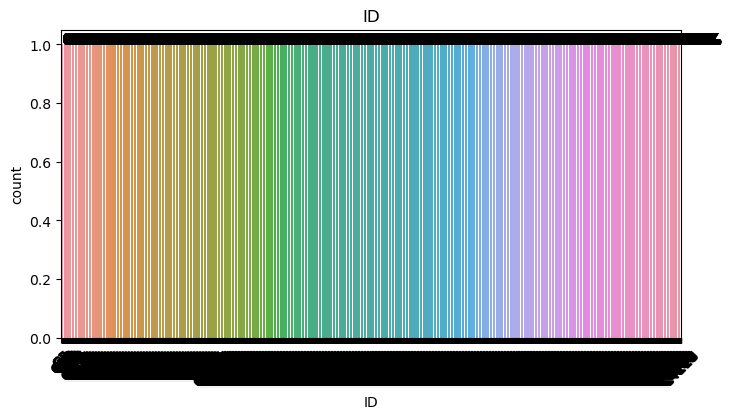

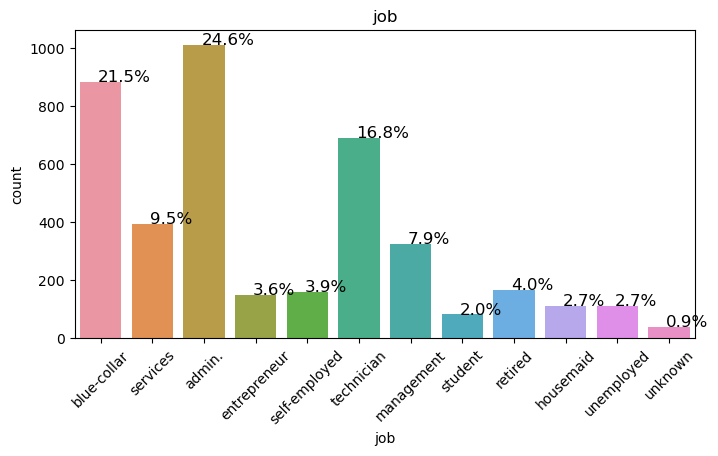

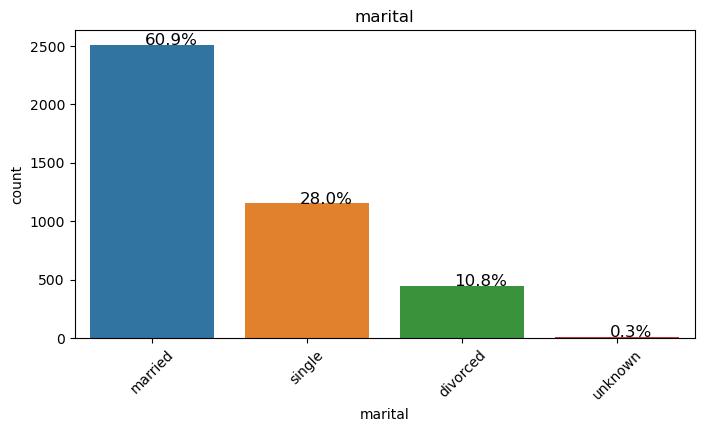

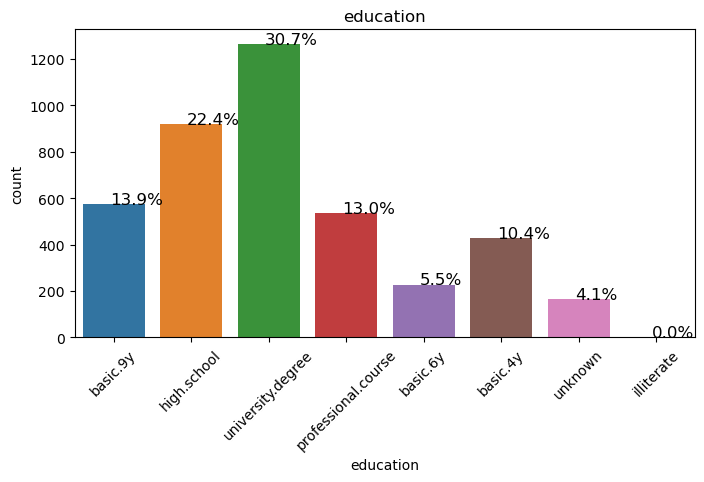

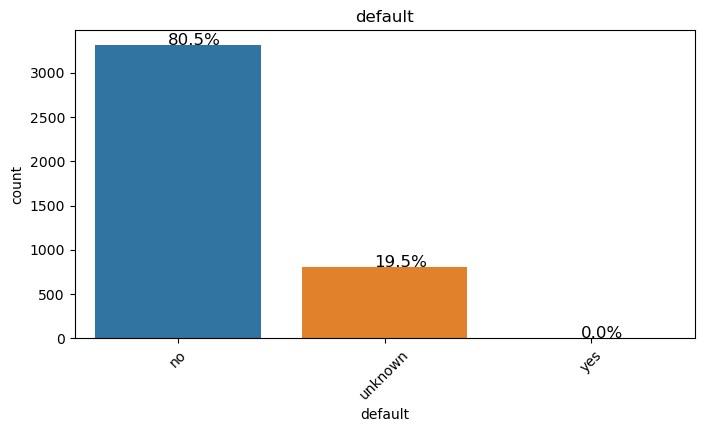

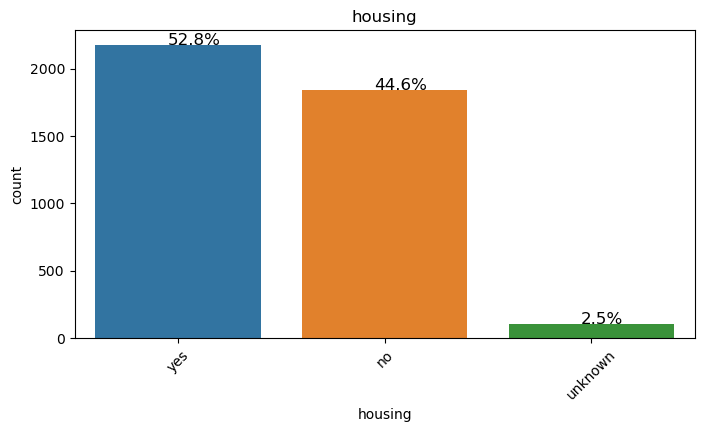

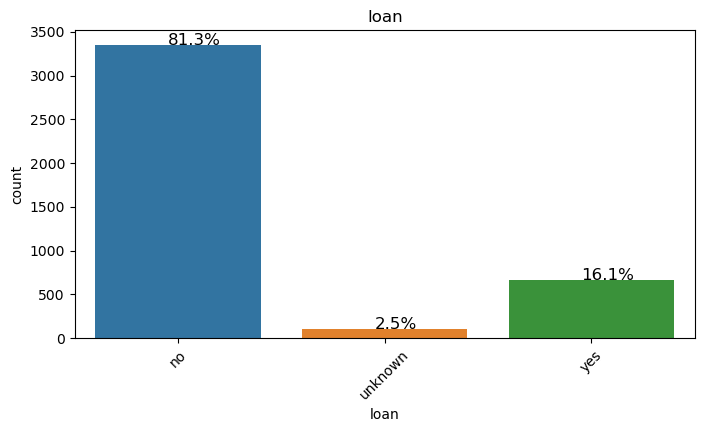

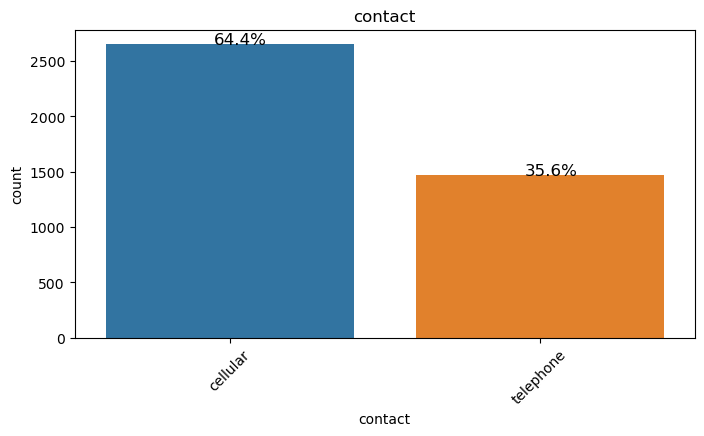

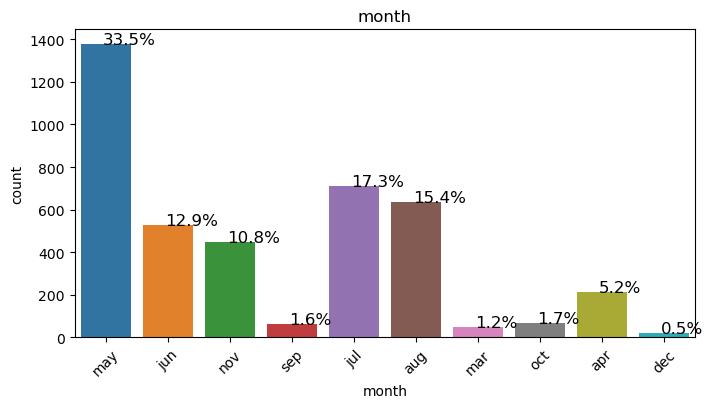

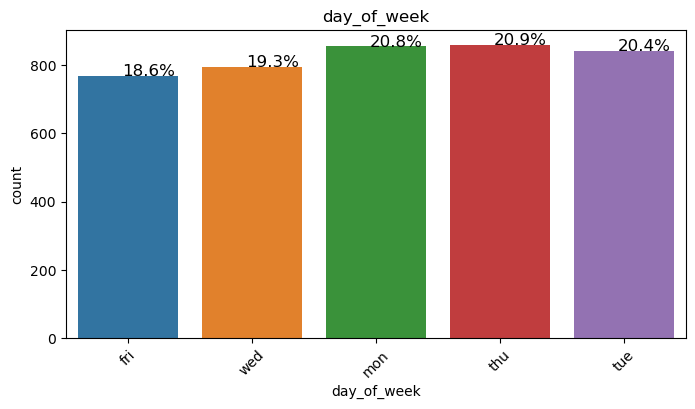

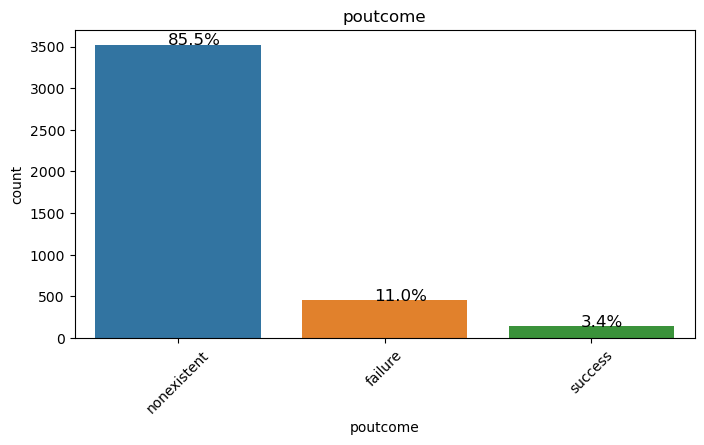

In [42]:
for col in cat_data:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=Bank_total[col], data=Bank_total)
    plt.title(col)
    plt.xticks(rotation=45)
    without_hue(ax,Bank_total[col])

**Education Column**

In [43]:
Bank_total['education'].replace(['basic.6y'],['primary'], inplace=True)

In [44]:
Bank_total['education'].replace(['basic.4y'],['primary'], inplace=True)

In [45]:
Bank_total['education'].replace(['basic.9y'],['primary'], inplace=True)

In [46]:
Bank_total['education'].replace(['illiterate'],['primary'], inplace=True)

In [47]:
Bank_total['education'].replace(['high.school'],['secondary'], inplace=True)

In [48]:
Bank_total['education'].replace(['professional.course'],['secondary'], inplace=True)

In [49]:
Bank_total['education'].replace(['university.degree'],['tertiary'], inplace=True)

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


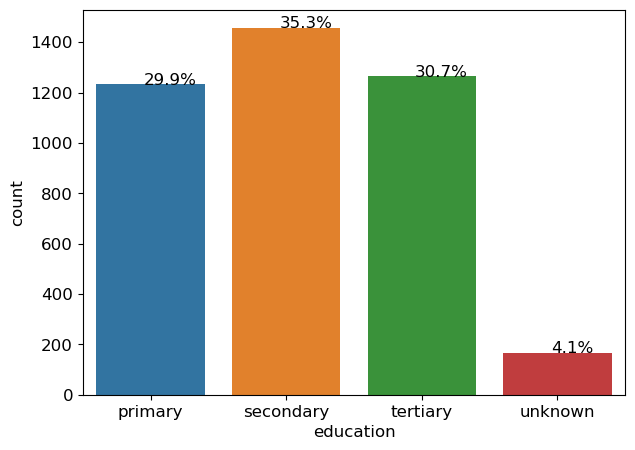

In [50]:
#after grouping the education fields into primary, secondary, tertiary and unknown
plt.figure(figsize=(7,5))
ax = sns.countplot('education', data = Bank_total)
plt.xticks(size = 12)
plt.xlabel('education', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,Bank_total.education)

**default column**

In [51]:
Bank_total['default'].replace(['unknown'],['yes'], inplace=True)

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


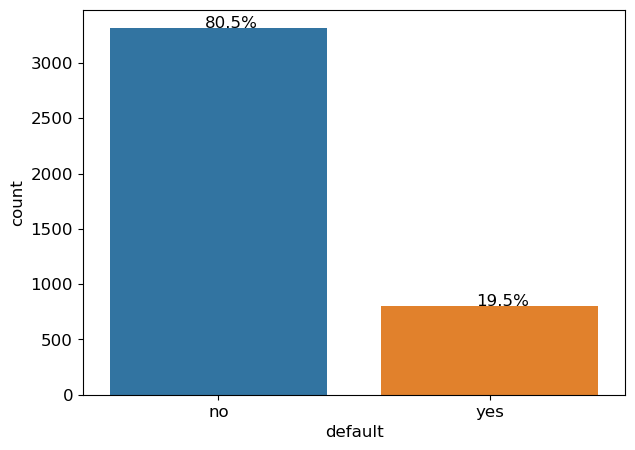

In [52]:
#after renaming the default column
plt.figure(figsize=(7,5))
ax = sns.countplot('default', data = Bank_total)
plt.xticks(size = 12)
plt.xlabel('default', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,Bank_total.default)

**Housing loan**

In [53]:
Bank_total['housing'].replace(['unknown'],['no'], inplace=True)

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


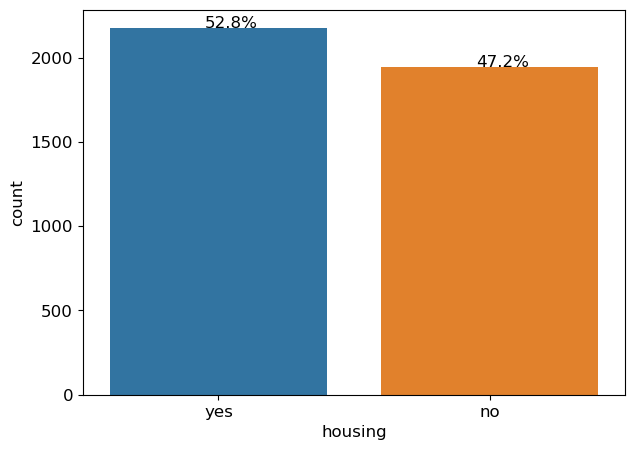

In [54]:
plt.figure(figsize=(7,5))
ax = sns.countplot('housing', data = Bank_total)
plt.xticks(size = 12)
plt.xlabel('housing', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,Bank_total.housing)

**personal loan**

In [55]:
Bank_total['loan'].replace(['unknown'],['yes'], inplace=True)

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


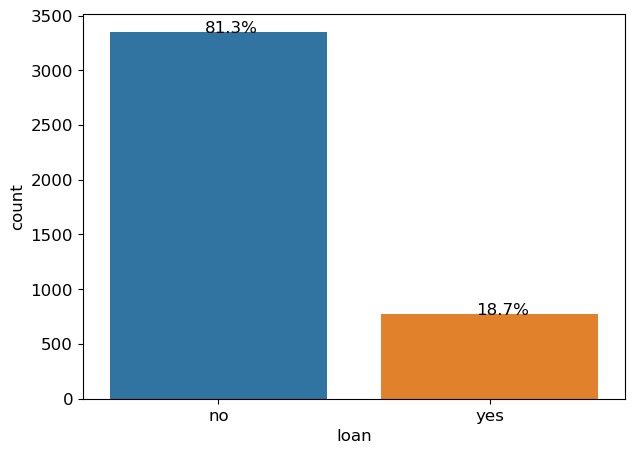

In [56]:
plt.figure(figsize=(7,5))
ax = sns.countplot('loan', data = Bank_total)
plt.xticks(size = 12)
plt.xlabel('loan', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,Bank_total.loan)

**marital**

In [57]:
Bank_total['marital'].replace(['unknown'],['divorced'], inplace=True)

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


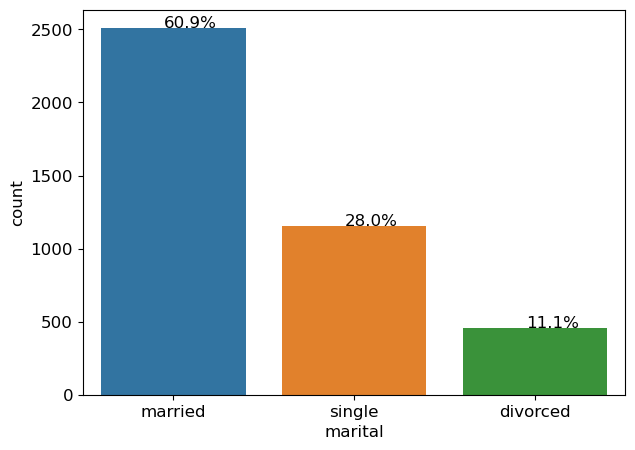

In [58]:
plt.figure(figsize=(7,5))
ax = sns.countplot('marital', data = Bank_total)
plt.xticks(size = 12)
plt.xlabel('marital', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,Bank_total.marital)

# Converting Categorical column to Numerical column 

In [59]:
#categorical columns converting using get_dummies
Bank_total = pd.get_dummies(Bank_total, columns=['contact','loan','housing','default','poutcome','day_of_week','month','education','marital','job'])

In [60]:
Bank_total.head()

,ID,age,duration,campaign,pdays,previous,emp.var.rate,nr.employed,approved,contact_cellular,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,C1,30.0,487.0,2.0,999,0,-1.8,5099.1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,C2,39.0,346.0,4.0,999,0,1.1,5191.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,C3,28.8,227.0,1.0,999,0,1.4,5228.1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,C4,38.0,60.0,3.0,999,0,1.4,5228.1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,C5,47.0,60.0,1.0,999,0,-0.1,5195.8,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Train_test_split

In [64]:
X = Bank_total.drop(['approved'], axis=1)
y = Bank_total['approved']

In [65]:
# Split the data into training and testing sets
train = Bank_total.sample(frac=0.8, random_state=42)
test = Bank_total.drop(train.index)

In [66]:
# Split the training and testing data into features and labels
X_train = train.drop(['ID', 'approved'], axis=1).values
y_train = train['approved'].values
X_test = test.drop(['ID', 'approved'], axis=1).values
y_test = test['approved'].values

In [67]:
# create an instance of the StandardScaler
scaler = StandardScaler()

# fit the scaler to your data
scaler.fit(X_train)

# transform your data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model

In [68]:
class NaiveBayes:
    def __init__(self):
        self.prior_probs = {}
        self.likelihood_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute prior probabilities
        for c in self.classes:
            self.prior_probs[c] = np.sum(y == c) / n_samples

        # Compute likelihood probabilities
        for c in self.classes:
            X_c = X[y == c]
            self.likelihood_probs[c] = (X_c.sum(axis=0) + 1) / (np.sum(X_c) + n_features)

    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.prior_probs[c])
            likelihood = np.log(self.likelihood_probs[c])
            posterior = np.sum(likelihood * X, axis=1) + prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]
    
def accuracy_score(y_true, y_pred):
        
        accuracy = np.sum(y_true == y_pred)/len(y_true) *100
        return accuracy

In [69]:
nb = NaiveBayes()
nb.fit(X_train_scaled,y_train)
predictions = nb.predict(X_test_scaled)
#predictions=predictions.reshape(-1,1)
print("Naive Bayes classification accuracy ",accuracy_score(y_test,predictions))

Naive Bayes classification accuracy  89.68446601941747


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_11388\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])


In [70]:
def cross_val_score(nb, X, y, k=5):
    scores = []
    n = len(y)
    idx = np.arange(n)
    np.random.shuffle(idx)
    for i in range(k):
        test_idx = idx[int(i * n / k):int((i + 1) * n / k)]
        train_idx = np.concatenate([idx[:int(i * n / k)], idx[int((i + 1) * n / k):]])
        X_train_scaled, y_train = X[train_idx], y[train_idx]
        X_test_scaled, y_test = X[test_idx], y[test_idx]
        nb.fit(X_train_scaled, y_train)
        y_pred = nb.predict(X_test_scaled)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)

In [71]:
best_score = 0
best_alpha = None

for alpha in [0.1, 0.01, 0.001]:
    nb = NaiveBayes()
    scores = cross_val_score(nb, X_train_scaled, y_train, k=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# Train and evaluate the model with the best hyperparameters
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"best_alpha: {best_alpha}")
print(f"best_score: {best_score}")

Accuracy: 89.68446601941747
best_alpha: 0.1
best_score: 88.89226100151747


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_11388\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])


In [ ]:
-----------------------------------------